Answer to Question 1

1.A. Number of keypoints vs. contrastThreshold
From the plot, we observe that increasing the contrastThreshold greatly reduces the number of detected keypoints. For very low threshold values, even low‐contrast features or marginal details are considered “valid,” leading to a large set of keypoints. As the threshold goes up, those weaker features are dismissed, so the SIFT detector finds fewer (but typically more distinctive) keypoints.

1.B. Effect on robustness to noise and relation to scale‐space

Robustness to Noise: A higher contrastThreshold filters out low‐contrast (and often noise‐driven) features. Hence, with a higher threshold, the algorithm becomes more tolerant to noise because only stronger features with higher contrast remain.
Relation to Scale‐Space Extrema: In SIFT, keypoints are detected as local extrema in the scale‐space representation. A stricter contrastThreshold discards shallow or weak extrema and retains only the more pronounced ones. This means that with a higher threshold, we end up with only the most salient and robust local maxima/minima—features that are less likely to be spurious or noise‐driven.

contrastThreshold=0.01, number of keypoints=417
contrastThreshold=0.04, number of keypoints=187
contrastThreshold=0.1, number of keypoints=62
contrastThreshold=0.2, number of keypoints=6
contrastThreshold=0.3, number of keypoints=0


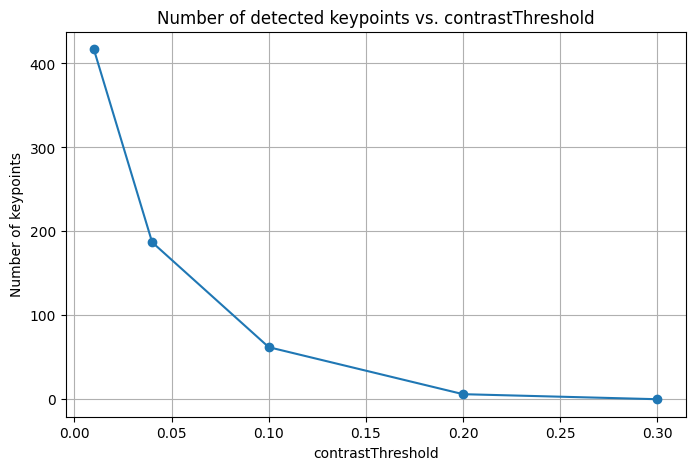

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image_path = 'Blox.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

threshold_values = [0.01, 0.04, 0.1, 0.2, 0.3]

keypoints_count = []
for ct in threshold_values:
    sift = cv2.SIFT_create(contrastThreshold=ct)

    kp, des = sift.detectAndCompute(image, None)

    keypoints_count.append(len(kp))
    print(f"contrastThreshold={ct}, number of keypoints={len(kp)}")

plt.figure(figsize=(8, 5))
plt.plot(threshold_values, keypoints_count, marker='o', linestyle='-')
plt.title('Number of detected keypoints vs. contrastThreshold')
plt.xlabel('contrastThreshold')
plt.ylabel('Number of keypoints')
plt.grid(True)
plt.show()


Answer to Question 2

2.A. Scale and Rotation Invariance
By inspecting the images at different scales (0.5, 1.0, 2.0) and rotation angles (0°, 45°, 90°, 180°), we see that SIFT preserves a consistent set of keypoints (albeit sometimes with minor shifts in position or slightly different counts). These results confirm that SIFT’s detection mechanism is designed to be invariant to changes in scale and rotation. The overall distributions of keypoints remain similar, indicating that characteristic structures of the scene are recognized regardless of how the image is scaled or rotated.

2.B. Repeating the process with contrastThreshold = 0.1
When using contrastThreshold = 0.1, the overall invariance to scale and rotation still holds (i.e., the same structural parts of the image generate keypoints across transformations). However, the total number of keypoints decreases compared to the default threshold. We discard more low‐contrast features, so only the stronger corners or edges remain. Despite this reduction, the keypoints that do persist still exhibit the same robustness to changes in scale and rotation.

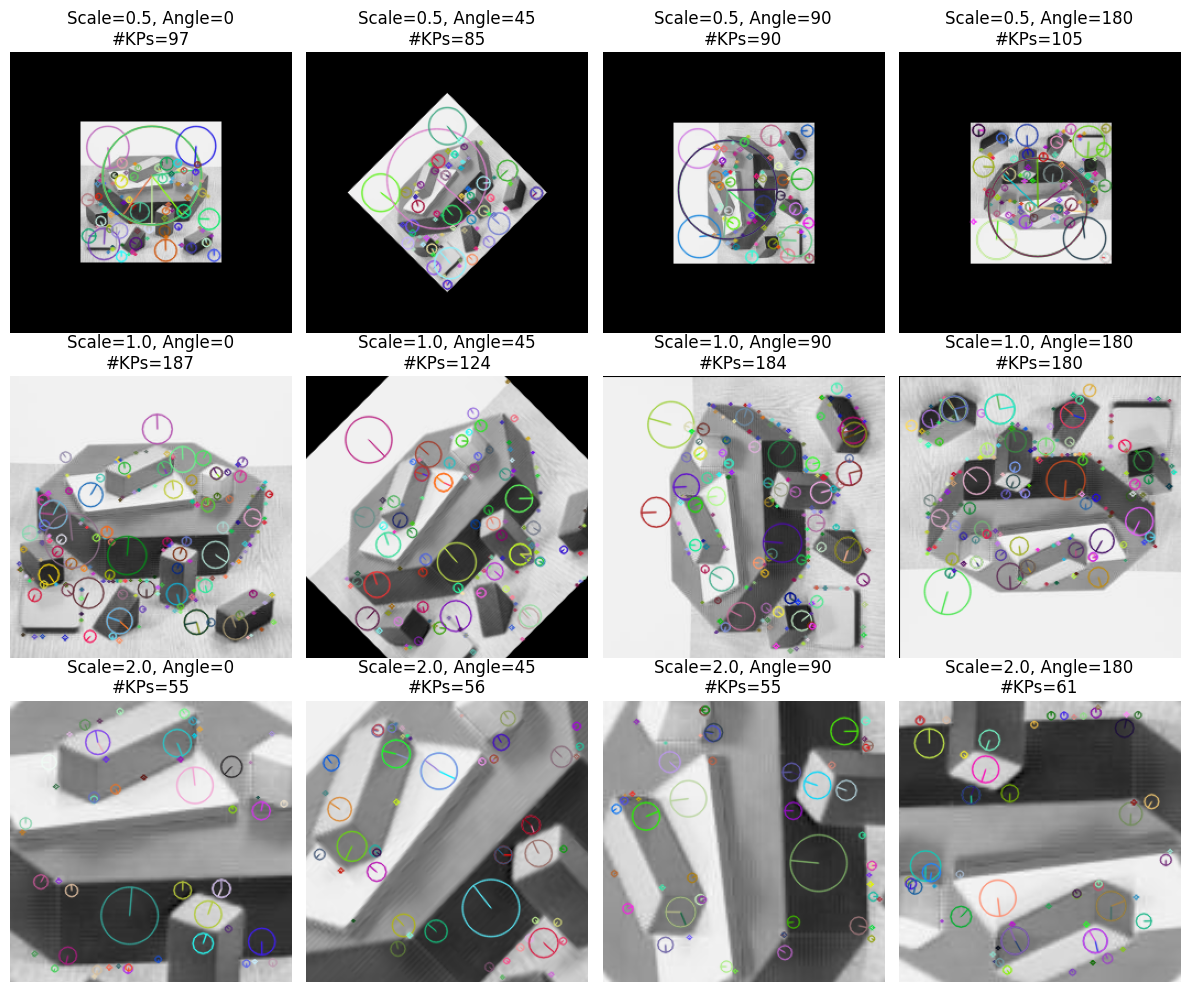

In [ ]:
|import cv2
import numpy as np
import matplotlib.pyplot as plt


original_img_color = cv2.imread('Blox.jpg', cv2.IMREAD_COLOR)
original_img_gray  = cv2.cvtColor(original_img_color, cv2.COLOR_BGR2GRAY)

h, w = original_img_gray.shape
scales = [0.5, 1.0, 2.0]
angles = [0, 45, 90, 180]

sift = cv2.SIFT_create()

plt.figure(figsize=(12, 10))
plot_index = 1

for scale in scales:
    for angle in angles:
        # getRotationMatrix2D(center, angleInDegrees, scaleFactor)
        M = cv2.getRotationMatrix2D((w/2, h/2), angle, scale)

        # warpAffine(input, M, output_size)
        transformed_img = cv2.warpAffine(original_img_gray, M, (w, h))

        kp, des = sift.detectAndCompute(transformed_img, None)

        transformed_with_kp = cv2.drawKeypoints(
            transformed_img, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
        )

        plt.subplot(len(scales), len(angles), plot_index)
        plt.imshow(transformed_with_kp, cmap='gray')
        plt.title(f"Scale={scale}, Angle={angle}\n#KPs={len(kp)}")
        plt.axis('off')

        plot_index += 1

plt.tight_layout()
plt.show()
